# testing

In [63]:
import pandas as pd
from datasets import load_dataset

fever_dataset = load_dataset("fever/fever",'v1.0')

c:\Users\phoni\anaconda3\envs\NLP_env\lib\site-packages\datasets\load.py:1486: FutureWarning: The repository for fever/fever contains custom code which must be executed to correctly load the dataset. You can inspect the repository content at https://hf.co/datasets/fever/fever
You can avoid this message in future by passing the argument `trust_remote_code=True`.
Passing `trust_remote_code=True` will be mandatory to load this dataset from the next major release of `datasets`.
  warnings.warn(


## data collection

### FEVER

In [64]:
label_type_ls = list(set(fever_dataset['train']['label']))

label_type_ls

['NOT ENOUGH INFO', 'REFUTES', 'SUPPORTS']

In [65]:
fever_dataset.keys()

dict_keys(['train', 'labelled_dev', 'unlabelled_dev', 'unlabelled_test', 'paper_dev', 'paper_test'])

In [66]:
fever_dataset['train']

Dataset({
    features: ['id', 'label', 'claim', 'evidence_annotation_id', 'evidence_id', 'evidence_wiki_url', 'evidence_sentence_id'],
    num_rows: 311431
})

In [67]:
fever_dataset['paper_dev']

Dataset({
    features: ['id', 'label', 'claim', 'evidence_annotation_id', 'evidence_id', 'evidence_wiki_url', 'evidence_sentence_id'],
    num_rows: 18999
})

In [68]:
fever_dataset['paper_test']

Dataset({
    features: ['id', 'label', 'claim', 'evidence_annotation_id', 'evidence_id', 'evidence_wiki_url', 'evidence_sentence_id'],
    num_rows: 18567
})

In [69]:
paper_dev_df = pd.DataFrame(fever_dataset['paper_dev'])
paper_test_df = pd.DataFrame(fever_dataset['paper_test'])

paper_dev_df.head()

,id,label,claim,evidence_annotation_id,evidence_id,evidence_wiki_url,evidence_sentence_id
0,91198,NOT ENOUGH INFO,Colin Kaepernick became a starting quarterback...,108548,-1,,-1
1,194462,NOT ENOUGH INFO,Tilda Swinton is a vegan.,227768,-1,,-1
2,137334,SUPPORTS,Fox 2000 Pictures released the film Soul Food.,289914,283015,Soul_Food_-LRB-film-RRB-,-1
3,137334,SUPPORTS,Fox 2000 Pictures released the film Soul Food.,291259,284217,Soul_Food_-LRB-film-RRB-,-1
4,137334,SUPPORTS,Fox 2000 Pictures released the film Soul Food.,293412,285960,Soul_Food_-LRB-film-RRB-,-1


In [70]:
paper_test_df.head()

,id,label,claim,evidence_annotation_id,evidence_id,evidence_wiki_url,evidence_sentence_id
0,113501,NOT ENOUGH INFO,Grease had bad reviews.,133128,-1,,-1
1,163803,SUPPORTS,Ukrainian Soviet Socialist Republic was a foun...,296950,288668,Ukrainian_Soviet_Socialist_Republic,7
2,163803,SUPPORTS,Ukrainian Soviet Socialist Republic was a foun...,298602,290067,Ukrainian_Soviet_Socialist_Republic,7
3,163803,SUPPORTS,Ukrainian Soviet Socialist Republic was a foun...,298602,290067,United_Nations,-1
4,163803,SUPPORTS,Ukrainian Soviet Socialist Republic was a foun...,300696,291816,Ukrainian_Soviet_Socialist_Republic,7


In [71]:
paper_test_df.label.unique()

array(['NOT ENOUGH INFO', 'SUPPORTS', 'REFUTES'], dtype=object)

### Analysis dataset

In [72]:
def label_bar_chart_fev(input_df: pd.DataFrame, title: str = "ferver Dataset") -> None:
  
    # computes frequencies of labels and converts to percentages
    label_frequencies = input_df['label'].value_counts(normalize=True)
    
    def multiply_100(x):
        return x * 100
    
    # "apply" is a handy way to call a function on every row of data.
    label_frequencies = label_frequencies.apply(multiply_100)
    
    # bar chart ordering and  colors for readability.
    labels = ['NOT ENOUGH INFO', 'SUPPORTS', 'REFUTES']
    colors = [
        'coral', 
        'salmon', 
        'peachpuff', 
    ]
    
    label_frequencies = label_frequencies.reindex(index = labels)
    
    
    # creates a horizontal bar chart with a descriptive title
    axis = label_frequencies.plot(kind='barh', figsize=(4, 2), color=colors)
    axis.set_title(f"distribution of label values ({title}, sample_size={len(input_df)})", size=20);

In [73]:
train_fevers = fever_dataset['train']

#dataset to pandas dataframe
df_fever_train = pd.DataFrame(train_fevers)
df_fever_train = df_fever_train[['label', 'claim','evidence_wiki_url']]
df_fever_paper_dev = paper_dev_df[['label','claim','evidence_wiki_url']]
df_fever_paper_test = paper_test_df[['label','claim','evidence_wiki_url']]


In [74]:
df_fever_train.head(3)

,label,claim,evidence_wiki_url
0,SUPPORTS,Nikolaj Coster-Waldau worked with the Fox Broa...,Nikolaj_Coster-Waldau
1,SUPPORTS,Nikolaj Coster-Waldau worked with the Fox Broa...,Fox_Broadcasting_Company
2,SUPPORTS,Roman Atwood is a content creator.,Roman_Atwood


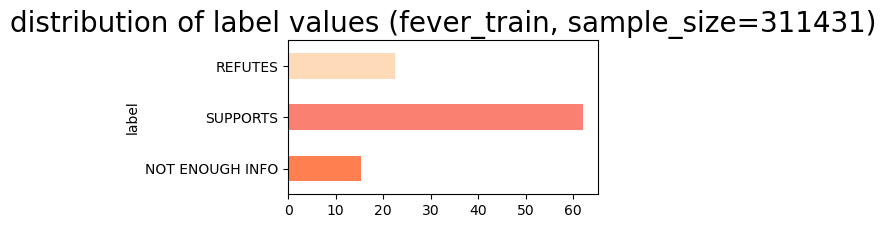

In [75]:
label_bar_chart_fev(df_fever_train, title="fever_train")

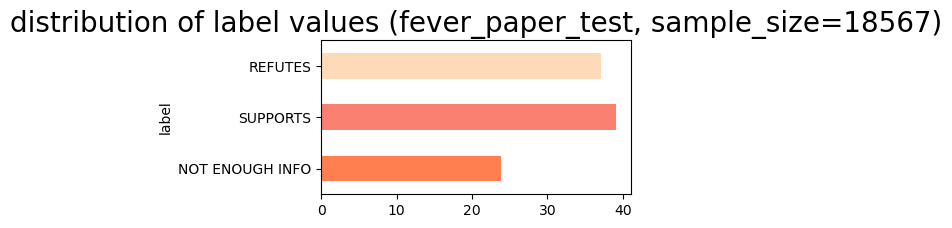

In [76]:
label_bar_chart_fev(df_fever_paper_test, title="fever_paper_test")

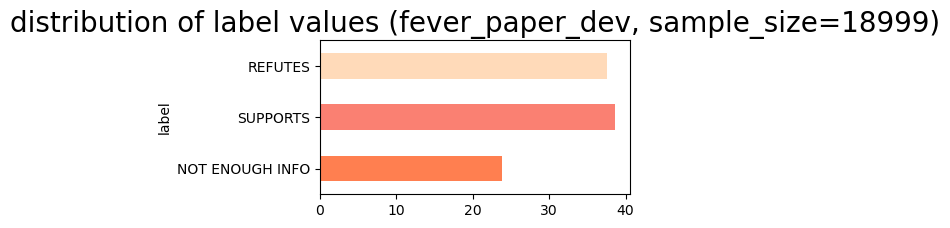

In [77]:
label_bar_chart_fev(df_fever_paper_dev, title="fever_paper_dev")

In [78]:
len(df_fever_paper_dev), len(df_fever_paper_test),len(df_fever_train)

(18999, 18567, 311431)

### LIAR

In [79]:
def read_dataframe(tsv_file:str)->pd.DataFrame:
    """read lair dataset and convert to dataframe 

    Args:
        tsv_file (string): tsv file path

    Returns:
        dataframe: dataframe of the lair dataset
    """
    df = pd.read_csv(tsv_file, delimiter='\t', dtype=object)
    df.fillna("", inplace=True)
    df.columns = [
        'id',                # Column 1: the ID of the statement ([ID].json).
        'label',             # Column 2: the label.
        'statement',         # Column 3: the statement.
        'subjects',          # Column 4: the subject(s).
        'speaker',           # Column 5: the speaker.
        'speaker_job_title', # Column 6: the speaker's job title.
        'state_info',        # Column 7: the state info.
        'party_affiliation', # Column 8: the party affiliation.

        # Column 9-13: the total credit history count, including the current statement.
        'count_1', # barely true counts.
        'count_2', # false counts.
        'count_3', # half true counts.
        'count_4', # mostly true counts.
        'count_5', # pants on fire counts.

        'context' # Column 14: the context (venue / location of the speech or statement).
    ]
    return df

In [80]:
fp = 'liar_ds/'
train_df = read_dataframe(f'{fp}/train.tsv')
test_df = read_dataframe(f'{fp}/test.tsv')
val_df = read_dataframe(f'{fp}/valid.tsv')

In [81]:
train_df.head(3)

,id,label,statement,subjects,speaker,speaker_job_title,state_info,party_affiliation,count_1,count_2,count_3,count_4,count_5,context
0,10540.json,half-true,When did the decline of coal start? It started...,"energy,history,job-accomplishments",scott-surovell,State delegate,Virginia,democrat,0,0,1,1,0,a floor speech.
1,324.json,mostly-true,"Hillary Clinton agrees with John McCain ""by vo...",foreign-policy,barack-obama,President,Illinois,democrat,70,71,160,163,9,Denver
2,1123.json,false,Health care reform legislation is likely to ma...,health-care,blog-posting,,,none,7,19,3,5,44,a news release


In [82]:
merged_df = pd.concat([train_df, test_df, val_df], ignore_index=True)
merged_df = merged_df[['label', 'statement', 'context']]
merged_df.head(3)

,label,statement,context
0,half-true,When did the decline of coal start? It started...,a floor speech.
1,mostly-true,"Hillary Clinton agrees with John McCain ""by vo...",Denver
2,false,Health care reform legislation is likely to ma...,a news release


## Analysing the dataset 

In [83]:

import seaborn as sns
import matplotlib.pyplot as plt

def label_bar_chart(input_df: pd.DataFrame, title: str = "LIAR Dataset") -> None:
    """plot lair dataset as bar chart 

    Args:
        input_df (pd.DataFrame): _description_
        title (str, optional): _description_. Defaults to "LIAR Dataset".

    Returns:
        _type_: _description_
    """
    # computes frequencies of labels and converts to percentages
    label_frequencies = input_df['label'].value_counts(normalize=True)
    
    def multiply_100(x):
        return x * 100
    
    # "apply" is a handy way to call a function on every row of data.
    label_frequencies = label_frequencies.apply(multiply_100)
    
    # bar chart ordering and  colors for readability.
    labels = ['pants-fire', 'false', 'barely-true', 'half-true', 'mostly-true', 'true']
    colors = [
        'orangered', # pants-fire
        'coral', # false
        'salmon', # barely-true
        'peachpuff', # half-true
        'skyblue', # mostly-true
        'deepskyblue' # true
    ]
    
    label_frequencies = label_frequencies.reindex(index = labels)
    
    
    # creates a horizontal bar chart with a descriptive title
    axis = label_frequencies.plot(kind='barh', figsize=(4, 2), color=colors)
    axis.set_title(f"distribution of label values ({title}, sample_size={len(input_df)})", size=20);

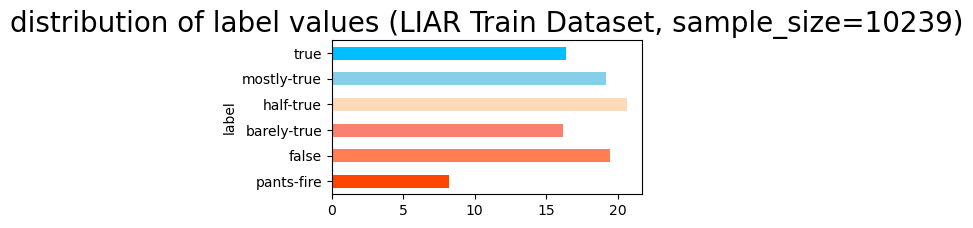

In [84]:
label_bar_chart(train_df, "LIAR Train Dataset")

### Speaker analysis 

In [85]:
unique_speaker_ls = train_df['speaker'].value_counts().index.tolist()

avg_statements_per_speaker = train_df['speaker'].value_counts().mean()

print(f"average statements per speaker: {avg_statements_per_speaker}")
unique_speaker_ls[:5], len(unique_speaker_ls)

average statements per speaker: 3.5185567010309278


(['barack-obama',
  'donald-trump',
  'hillary-clinton',
  'mitt-romney',
  'scott-walker'],
 2910)

In [86]:
def speaker_bar_plot(df:pd.DataFrame, speaker: str)-> pd.DataFrame:
    """plot speaker bar chart 

    Args:
        df (pd.DataFrame): dataframe
        speaker (str): speaker

    Returns:
        pd.DataFrame: dataframe
    """
    speaker_df = df[df['speaker'] == speaker]
    label_bar_chart(speaker_df, f"LIAR {speaker} Dataset")
    return speaker_df

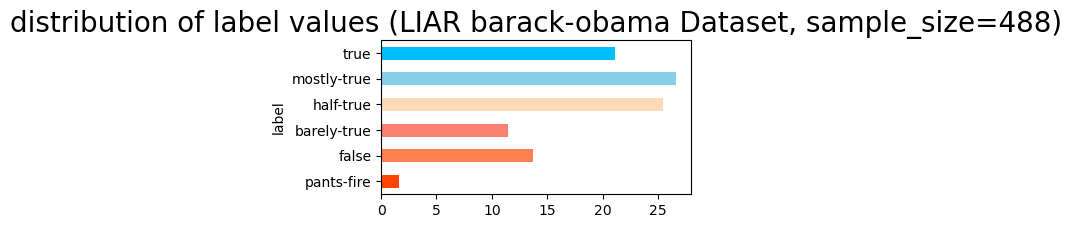

In [87]:
ret_df = speaker_bar_plot(train_df, 'barack-obama')

In [88]:
#filter lair dataset mostly-true, true to true else false
def filter_lair_dataset(df:pd.DataFrame)->pd.DataFrame:
    """filter lair dataset mostly-true, true to true else false

    Args:
        df (pd.DataFrame): dataframe

    Returns:
        pd.DataFrame: dataframe
    """
    res = df.copy()
    res['label'] = res['label'].apply(lambda x: 1 if x in ['mostly-true', 'true'] else 0)
    return res

In [89]:
train_df[['label','statement', 'speaker']].head(3)

,label,statement,speaker
0,half-true,When did the decline of coal start? It started...,scott-surovell
1,mostly-true,"Hillary Clinton agrees with John McCain ""by vo...",barack-obama
2,false,Health care reform legislation is likely to ma...,blog-posting


### Subject analysis

In [90]:
subj_df = train_df[['label', 'subjects']].copy()

def csv2ls(csv_str:str)->list:
    """convert csv string to list 

    Args:
        csv_str (str): csv string

    Returns:
        list: list
    """
    return csv_str.split(',')

subj_df['subjects'] = subj_df['subjects'].apply(csv2ls)
#convert col into row
subj_df = subj_df.explode('subjects')
subj_df.head()


,label,subjects
0,half-true,energy
0,half-true,history
0,half-true,job-accomplishments
1,mostly-true,foreign-policy
2,false,health-care


In [91]:
unique_subjects_ls = subj_df['subjects'].value_counts().index.tolist()
unique_subjects_ls[:5], len(unique_subjects_ls)

(['economy', 'health-care', 'taxes', 'federal-budget', 'education'], 143)

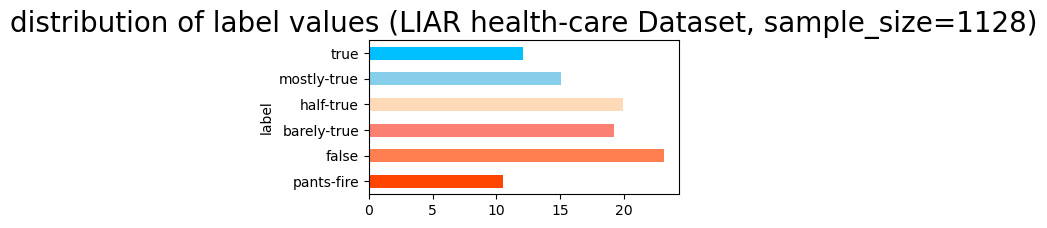

In [92]:
def subj_bar_plot(df:pd.DataFrame, subject: str)-> pd.DataFrame:
    """plot subject bar chart 

    Args:
        df (pd.DataFrame): dataframe
        subject (str): subject

    Returns:
        pd.DataFrame: dataframe
    """
    subj_df = df[df['subjects'] == subject]
    label_bar_chart(subj_df, f"LIAR {subject} Dataset")
    return subj_df

ret_df = subj_bar_plot(subj_df, 'health-care')

In [93]:
from typing import Dict

def score_label(label:str)-> float:
    """score label 

    Args:
        label (str): label

    Returns:
        float: score
    """
    label_score = {
        'true': 2,
        'mostly-true': 1,
        'half-true': 0,
        'barely-true': -1,
        'false': -2,
        'pants-fire': -3
    } 
    return label_score[label]

def model_speaker_statements(input_df: pd.DataFrame) -> Dict[str, Dict[str, float]]:
    """_summary_

    Args:
        input_df (pd.DataFrame): _description_

    Returns:
        Dict[str, Dict[str, float]]: _description_
    """
    tot = {}
    count = {}
    
    # for each row in the input_df
    for _, row in input_df.T.items():
        
        # grab the pertinent information
        speaker = row['speaker']
        score = score_label(row['label'])
        words = row['statement'].lower().split()
        
        # prevents double counting of words
        uniques = []
        
        for word in words:
            # if its a word we've already seen, skip processing
            if word in uniques:
                continue
                    
            uniques.append(word)
            
            if speaker in tot:
                if word in tot[speaker]:
                    tot[speaker][word] += score
                    count[speaker][word] += 1
                else:
                    tot[speaker][word] = score
                    count[speaker][word] = 1
                    
            else:
                tot[speaker] = {}
                tot[speaker][word] = score
                
                count[speaker] = {}
                count[speaker][word] = 1
                
    
    # compute averages and return model
    for speaker in tot:
        for word in tot[speaker]:
            tot[speaker][word] = tot[speaker][word] / count[speaker][word]
            
    return tot


def score_speaker_statement(model: Dict[str, Dict[str, float]], speaker: str, phrase: str) -> float:
        
    idx = 0
    score = 0
    if speaker not in model:
        print(f"speaker {speaker} not in speaker list")
        return None
    
    for word in phrase.split():
        word = word.lower()
        
        if word in model[speaker]:
            score += model[speaker][word]
            idx += 1
            
    if not idx:
        return None
    
    return score / idx
       
def get_label_by_score(score: float)-> str:
    print(score)
    
    label_score_ranges = {
        'true': (2, float('inf')),       
        'mostly-true': (1, 2),           
        'half-true': (0, 1),             
        'barely-true': (-1, 0),          
        'false': (-2, -1),               
        'pants-fire': (float('-inf'), -2)
    }
    
    for key, (lower, upper) in label_score_ranges.items():
        if lower <= score < upper:
            return key
    return None  # Return None if the score does not match any range       


def sentiment_speaker_statement(model: Dict[str, Dict[str, float]], speaker: str, phrase: str) -> str:

    score = score_speaker_statement(model, speaker, phrase)
    

    
    if score is None:
        return None

    if score <= 0:
        return get_label_by_score(score)
    
    return get_label_by_score(score)



In [94]:
from IPython.display import Image

#build a model from the lair dataset 
model = model_speaker_statements(train_df)

In [95]:
speaker = 'joe-biden'
senti = f' Starting in 2025 "no matter what your total bills are for prescription drugs,” Medicare Part D users will never pay “more than $2,000 a year, because some of these cancer drugs are 10(,000 to) 15,000 bucks a year.” '

sentiment_speaker_statement(model, speaker, senti)

0.43943713450292393


'half-true'

In [96]:
speaker = 'donald-trump'
senti = "The unemployment rate for Wisconsin workers has reached historic lows. It’s never been this low before, ever, ever, ever."

sentiment_speaker_statement(model, speaker, senti)

-1.3078901385353


'false'

## RAG testing 

In [97]:
import torch
from transformers import RagTokenizer, RagRetriever, RagSequenceForGeneration


# tokenizer = RagTokenizer.from_pretrained("facebook/rag-token-base")
# retriver = RagRetriever.from_pretrained("facebook/rag-token-base", index_name="exact", use_dummy_dataset=True)
# model = RagSequenceForGeneration.from_pretrained("facebook/rag-token-base", retriever=retriver)

In [98]:
import requests
import os
from dotenv import load_dotenv

load_dotenv()
api_key = os.getenv("API_KEY")
api_key = api_key[1:-1]


In [99]:

def fetch_doc_from_newsapi(query:str, num_articles:int = 5)->list:
    """the function fetches news articles from newsapi.org

    Args:
        query (str): text e.g. news topic or key word 
        num_articles (int, optional): articles that fetched from newsapi. Defaults to 5.

    Returns:
        list: returns list of articles by query
    """
    params = {
        'q': query,
        'pageSize': num_articles,
        'apiKey': api_key
    }

    response = requests.get('https://newsapi.org/v2/everything', params=params)
    response_json = response.json()
    print(response_json)
    # return articles


In [100]:
fetch_doc_from_newsapi('Big data')

{'status': 'error', 'code': 'apiKeyInvalid', 'message': 'Your API key is invalid or incorrect. Check your key, or go to https://newsapi.org to create a free API key.'}


In [101]:
def process_statement_rag_with_newsapi(statements: list, labels: list)->list:
    """use RAG model to process statements with newsapi

    Args:
        statements (list): list of statements
        labels (list): label including truth, mostly-true, half-true, barely-true, false, pants-fire

    Returns:
        list: return list of generated text 
    """
    res = []
    for sents, label in zip(statements, labels):
        # Fetch documents related to the statement from NewsAPI
        docs = fetch_doc_from_newsapi(sents)
        
        if not docs:
            res.append((["No relevant documents found"], label))
            continue
        
        # Tokenize the statement and documents
        inputs = tokenizer(sents, return_tensors="pt")
        doc_inputs = tokenizer(docs, return_tensors="pt", padding=True, truncation=True, max_length=512)

        # Generate prediction using retrieved documents
        outputs = model.generate(
            input_ids=inputs["input_ids"],
            context_input_ids=doc_inputs["input_ids"],
            context_attention_mask=doc_inputs["attention_mask"],
            num_return_sequences=1
        )

        # Decode the output
        gen_txt = tokenizer.batch_decode(outputs, skip_special_tokens=True)
        res.append((gen_txt[0], label))

    return res

In [102]:
ex_train_df = train_df.copy()

#remain only speaker, statement and label
ex_train_df = ex_train_df[['speaker', 'statement', 'label']]
ex_train_df = ex_train_df.sample(10)
ex_train_df


,speaker,statement,label
129,texas-house-democratic-caucus,Some neighborhood schools are closing.,mostly-true
8987,james-roosevelt,Three courts have found the new health care la...,true
5965,gary-johnson,The Pentagon itself says that we could elimina...,barely-true
6723,physicians-committee-responsible-medicine,Rhode Islands teen binge drinking rate is doub...,false
4369,rick-scott,Before this (federal health care) law was enac...,false
5925,gwen-moore,"In Wisconsin, deaths from domestic violence ar...",true
10095,john-thrasher,"Attorney General McCollum, Speaker-Designate C...",true
1864,sam-adams,Says theres $4 billion in private investment a...,barely-true
4232,alliance-retired-americans,Social Security doesnt contribute a penny to t...,barely-true
7018,chris-christie,The Democrats plan to raise your tax rates to ...,false


In [103]:
# result = process_statement_rag_with_newsapi(ex_train_df['statement'].tolist(), ex_train_df['label'].tolist())

In [104]:
# df_res = pd.DataFrame(result, columns=['generated_text', 'label'])
# df_res.head()



## Design

In [105]:
import spacy
from spacy.tokens import Span
nlp = spacy.load('en_core_web_trf')

In [106]:

def extract_entities(text):
  """extract entities from text using spacy and return a list of tuples containing the entity text and label

  Args:
      text (string): input text such as article or statement

  Returns:
      list: list of tuples containing the entity text and label
  """
  doc = nlp(text)
  return [(ent.text, ent.label_) for ent in doc.ents]

In [107]:
l = ex_train_df['statement'].tolist()
len(l)

10

In [108]:
#bias type 
# population bias : population bias in the liar datraset could arise from transparency in 
#the seletecion process and credibility dtemination.

# enrichment bias : the nature of veracity classification which allows claims to be labeld 
#as either true or false without shade of uncertainty can introduce enrinment biases 

## RoBERTa testing 


tensorflow no longer support win 11 TAT

In [109]:
import torch
import torch.optim as optim
import torch.nn as nn
import torch.nn.functional as F
from torch.autograd import Variable

In [110]:
if torch.cuda.is_available():
    device = torch.device('cuda')
    print('There are %d GPU(s) available.' % torch.cuda.device_count())
else:
    print('No GPU available, using the CPU instead.')
    device = torch.device('cpu')

There are 1 GPU(s) available.


In [111]:
merged_df = filter_lair_dataset(merged_df)
merged_df.head(3)

,label,statement,context
0,0,When did the decline of coal start? It started...,a floor speech.
1,1,"Hillary Clinton agrees with John McCain ""by vo...",Denver
2,0,Health care reform legislation is likely to ma...,a news release


In [112]:
sentences = merged_df['statement'].values
labels = merged_df['label'].values
sentences, labels

(array(['When did the decline of coal start? It started when natural gas took off that started to begin in (President George W.) Bushs administration.',
        'Hillary Clinton agrees with John McCain "by voting to give George Bush the benefit of the doubt on Iran."',
        'Health care reform legislation is likely to mandate free sex change surgeries.',
        ...,
        'John McCain and George Bush have "absolutely no plan for universal health care."',
        "A new poll shows 62 percent support the president's plan to reform health care. That means ... letting you choose between keeping the private insurance you have and a public health insurance plan.",
        'No one claims the report vindicating New Jersey Gov. Chris Christie in the bridge scandal is conclusive.'],
       dtype=object),
 array([0, 1, 0, ..., 1, 0, 0], dtype=int64))

In [113]:
#loading pre-trained model
from transformers import(
    RobertaForSequenceClassification,
    RobertaTokenizer,
    AdamW
)


#model
roberta_model = RobertaForSequenceClassification.from_pretrained('roberta-base', num_labels=2,
                                                                 output_attentions=False,
                                                                   output_hidden_states=False)

#tokenizer
roberta_tokenizer = RobertaTokenizer.from_pretrained('roberta-base')

#give pytorch to run on GPU
roberta_model.cuda()

print('model loaded')

c:\Users\phoni\anaconda3\envs\NLP_env\lib\site-packages\huggingface_hub\file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at roberta-base and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


model loaded


In [114]:
#tokenization 
print(f'original: {sentences[0]}')

print(f'tokenized: {roberta_tokenizer.tokenize(sentences[0])}')

print(f'token Ids: {roberta_tokenizer.convert_tokens_to_ids(roberta_tokenizer.tokenize(sentences[0]))}')

original: When did the decline of coal start? It started when natural gas took off that started to begin in (President George W.) Bushs administration.
tokenized: ['When', 'Ġdid', 'Ġthe', 'Ġdecline', 'Ġof', 'Ġcoal', 'Ġstart', '?', 'ĠIt', 'Ġstarted', 'Ġwhen', 'Ġnatural', 'Ġgas', 'Ġtook', 'Ġoff', 'Ġthat', 'Ġstarted', 'Ġto', 'Ġbegin', 'Ġin', 'Ġ(', 'President', 'ĠGeorge', 'ĠW', '.)', 'ĠBush', 's', 'Ġadministration', '.']
token Ids: [1779, 222, 5, 2991, 9, 4051, 386, 116, 85, 554, 77, 1632, 1123, 362, 160, 14, 554, 7, 1642, 11, 36, 6517, 1655, 305, 1592, 3516, 29, 942, 4]


In [115]:
max_len = 0

for sent in sentences:
    input_ids = roberta_tokenizer.encode(sent, add_special_tokens=True)
    max_len = max(max_len, len(input_ids))

print(f'max sentence length: {max_len}')

Token indices sequence length is longer than the specified maximum sequence length for this model (911 > 512). Running this sequence through the model will result in indexing errors


max sentence length: 911


In [116]:
roberta_input_ids = []
roberta_attention_masks = []
sents_ids = []
counter = 0

for sent in sentences:
    roberta_encoded_dict = roberta_tokenizer.encode_plus(
        sent,
        add_special_tokens=True,
        max_length=64,
        pad_to_max_length=True,
        return_attention_mask=True,
        return_tensors='pt'
    )

    roberta_input_ids.append(roberta_encoded_dict['input_ids'])
    roberta_attention_masks.append(roberta_encoded_dict['attention_mask'])

    #collect ids
    sents_ids.append(counter)
    counter += 1

#cvt to tensor
roberta_input_ids = torch.cat(roberta_input_ids, dim=0)
roberta_attention_masks = torch.cat(roberta_attention_masks, dim=0)

label=torch.tensor(labels)
sent_ids = torch.tensor(sents_ids)

#list of ids
print(f'original: {sentences[1]}')
print(f'ids: {roberta_input_ids[1]}')

Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
c:\Users\phoni\anaconda3\envs\NLP_env\lib\site-packages\transformers\tokenization_utils_base.py:2619: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  warnings.warn(


original: Hillary Clinton agrees with John McCain "by voting to give George Bush the benefit of the doubt on Iran."
ids: tensor([    0, 38655,  2235, 11687,    19,   610,  6973,    22,  1409,  3434,
            7,   492,  1655,  3516,     5,  1796,     9,     5,  2980,    15,
         1603,    72,     2,     1,     1,     1,     1,     1,     1,     1,
            1,     1,     1,     1,     1,     1,     1,     1,     1,     1,
            1,     1,     1,     1,     1,     1,     1,     1,     1,     1,
            1,     1,     1,     1,     1,     1,     1,     1,     1,     1,
            1,     1,     1,     1])


In [117]:
#train_test_split
from torch.utils.data import TensorDataset, random_split


#combine the training inputs into a TensorDataset
roberta_ds = TensorDataset(roberta_input_ids, roberta_attention_masks, label)

In [118]:
# Calculate the number of samples to include in each set.
train_size = int(0.9 * len(roberta_ds))
val_size = len(roberta_ds) - train_size

roberta_train_ds, roberta_val_ds = random_split(roberta_ds, [train_size, val_size])


In [119]:
# Checking whether the distribution of target is consitent across both the sets
label_temp_list = []
for a,b,c in roberta_train_ds:
  label_temp_list.append(c)

print('{:>5,} training samples'.format(train_size))
print('{:>5,} training samples with real disater tweets'.format(sum(label_temp_list)))


label_temp_list = []
for a,b,c in roberta_val_ds:
  label_temp_list.append(c)

print('{:>5,} validation samples'.format(val_size))
print('{:>5,} validation samples with real disater tweets'.format(sum(label_temp_list)))

11,509 training samples
4,035 training samples with real disater tweets
1,279 validation samples
  471 validation samples with real disater tweets


In [120]:
from torch.utils.data import DataLoader, RandomSampler, SequentialSampler
BATCH_SIZE = 32

roberta_train_dataloader = DataLoader(
    roberta_train_ds,
    sampler=RandomSampler(roberta_train_ds),
    batch_size=BATCH_SIZE
)

roberta_val_dataloader = DataLoader(
    roberta_val_ds,
    sampler=SequentialSampler(roberta_val_ds),
    batch_size=BATCH_SIZE
)

params = list(roberta_model.named_parameters())

print('The RoBERTa model has {:} different named parameters.\n'.format(len(params)))

print('==== Embedding Layer ====\n')

for p in params[0:5]:
    print("{:<55} {:>12}".format(p[0], str(tuple(p[1].size()))))

print('\n==== First Transformer ====\n')

for p in params[5:21]:
    print("{:<55} {:>12}".format(p[0], str(tuple(p[1].size()))))

print('\n==== Output Layer ====\n')

for p in params[-4:]:
    print("{:<55} {:>12}".format(p[0], str(tuple(p[1].size()))))

The RoBERTa model has 201 different named parameters.

==== Embedding Layer ====

roberta.embeddings.word_embeddings.weight               (50265, 768)
roberta.embeddings.position_embeddings.weight             (514, 768)
roberta.embeddings.token_type_embeddings.weight             (1, 768)
roberta.embeddings.LayerNorm.weight                           (768,)
roberta.embeddings.LayerNorm.bias                             (768,)

==== First Transformer ====

roberta.encoder.layer.0.attention.self.query.weight       (768, 768)
roberta.encoder.layer.0.attention.self.query.bias             (768,)
roberta.encoder.layer.0.attention.self.key.weight         (768, 768)
roberta.encoder.layer.0.attention.self.key.bias               (768,)
roberta.encoder.layer.0.attention.self.value.weight       (768, 768)
roberta.encoder.layer.0.attention.self.value.bias             (768,)
roberta.encoder.layer.0.attention.output.dense.weight     (768, 768)
roberta.encoder.layer.0.attention.output.dense.bias         

In [121]:
from transformers import get_linear_schedule_with_warmup

#optimizer
optim = AdamW(roberta_model.parameters(), lr=1e-5, eps=1e-8)

#train
epochs = 4

tot_step = len(roberta_train_dataloader) * epochs

#create lr scheduler
scheduler = get_linear_schedule_with_warmup(optim, num_warmup_steps=0, num_training_steps=tot_step)

c:\Users\phoni\anaconda3\envs\NLP_env\lib\site-packages\transformers\optimization.py:429: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


In [122]:
#training loop
import numpy as np
import time
import datetime

def flat_accuracy(preds, labels):
    pred_flat = np.argmax(preds, axis=1).flatten()
    labels_flat = labels.flatten()
    return np.sum(pred_flat == labels_flat) / len(labels_flat)

def format_time(elapsed):
    elapsed_rounded = int(round(elapsed))
    return str(datetime.timedelta(seconds=elapsed_rounded))


In [123]:
for step, batch in enumerate(roberta_train_dataloader):
    print(batch[0].shape)
    print(batch[1].shape)
    break

torch.Size([32, 64])
torch.Size([32, 64])


In [128]:
import random 

seed = 42

random.seed(seed)
np.random.seed(seed)
torch.manual_seed(seed)
torch.cuda.manual_seed_all(seed)

training_stats = []

tot_t0 = time.time()

for epoch_i in range(0, epochs ):
    print(f'======== Epoch {epoch_i + 1} / {epochs} ========')
    t0 = time.time()
    total_train_loss = 0

    roberta_model.train()

    for step, batch in enumerate(roberta_train_dataloader):
        if step % 40 == 0 and not step == 0:
            elapsed = format_time(time.time() - t0)
            print(f'Batch {step} of {len(roberta_train_dataloader)}. Elapsed: {elapsed}')

        #batch
        # [0] : input_ids
        # [1] : attention_mask
        # [2] : labels

        input_ids = batch[0].to(device)
        attention_mask = batch[1].to(device)
        labels = batch[2].to(device)

        roberta_model.zero_grad()

        outputs = roberta_model(input_ids,
                                attention_mask=attention_mask,
                                labels=labels)
        # Ensure the outputs are as expected
        if isinstance(outputs, dict):
            loss = outputs['loss']
            logits = outputs['logits']
        else:
            loss, logits = outputs


        if not isinstance(loss, torch.Tensor):
            raise ValueError(f'Expected loss to be a tensor, but got {type(loss)}')
        
  
        
        total_train_loss += loss.item()

        loss.backward()

        torch.nn.utils.clip_grad_norm_(roberta_model.parameters(), 1.0)

        optim.step()

        scheduler.step()
    
    #cal avg loss
    avg_train_loss = total_train_loss / len(roberta_train_dataloader)

    #how long epoch took
    training_time = format_time(time.time() - t0)

    print(f'Average training loss: {avg_train_loss}')
    print(f'Training epoch took: {training_time}')

    #validation
    print('Running Validation...')
    t0 = time.time()
    roberta_model.eval()

    total_eval_accuracy = 0
    total_eval_loss = 0
    nb_eval_steps = 0

    #eval 1 epoch
    for batch in roberta_val_dataloader:
        input_ids = batch[0].to(device)
        attention_mask = batch[1].to(device)
        labels = batch[2].to(device)

        with torch.no_grad():
            outputs = roberta_model(input_ids,
                                attention_mask=attention_mask,
                                labels=labels)
            
        # Ensure the outputs are as expected
        if isinstance(outputs, dict):
            loss = outputs['loss']
            logits = outputs['logits']
        else:
            loss, logits = outputs


        if not isinstance(loss, torch.Tensor):
            raise ValueError(f'Expected loss to be a tensor, but got {type(loss)}')
        
        total_eval_loss += loss.item()

        logits = logits.detach().cpu().numpy()
        label_ids = labels.to('cpu').numpy()

        total_eval_accuracy += flat_accuracy(logits, label_ids)

    avg_val_accuracy = total_eval_accuracy / len(roberta_val_dataloader)
    val_time = format_time(time.time() - t0)
    
    print(f'Accuracy: {avg_val_accuracy}')
    print(f'Validation took: {val_time}')

    training_stats.append(
        {
            'epoch': epoch_i + 1,
            'training_loss': avg_train_loss,
            'eval_loss': total_eval_loss / len(roberta_val_dataloader),
            'eval_accuracy': avg_val_accuracy,
            'training_time': training_time,
            'eval_time': val_time
        }
    )

print("training complete")
print(f'Total training took: {format_time(time.time() - tot_t0)}')


In [125]:
training_stats

[{'epoch': 1,
  'training_loss': 0.6282958808872435,
  'eval_loss': 0.6271068602800369,
  'eval_accuracy': 0.647429435483871,
  'training_time': '0:01:20',
  'eval_time': '0:00:03'},
 {'epoch': 2,
  'training_loss': 0.5854496196740203,
  'eval_loss': 0.6204048484563828,
  'eval_accuracy': 0.6497983870967742,
  'training_time': '0:01:20',
  'eval_time': '0:00:03'},
 {'epoch': 3,
  'training_loss': 0.5470459301438596,
  'eval_loss': 0.6318772658705711,
  'eval_accuracy': 0.6576108870967742,
  'training_time': '0:01:20',
  'eval_time': '0:00:03'},
 {'epoch': 4,
  'training_loss': 0.5066890599826972,
  'eval_loss': 0.6505293011665344,
  'eval_accuracy': 0.644304435483871,
  'training_time': '0:01:21',
  'eval_time': '0:00:03'}]

In [126]:
#evaluation

df_stats = pd.DataFrame(data=training_stats)

df_states = df_stats.set_index('epoch')

df_states

,training_loss,eval_loss,eval_accuracy,training_time,eval_time
epoch,,,,,
1,0.628296,0.627107,0.647429,0:01:20,0:00:03
2,0.585450,0.620405,0.649798,0:01:20,0:00:03
3,0.547046,0.631877,0.657611,0:01:20,0:00:03
4,0.506689,0.650529,0.644304,0:01:21,0:00:03


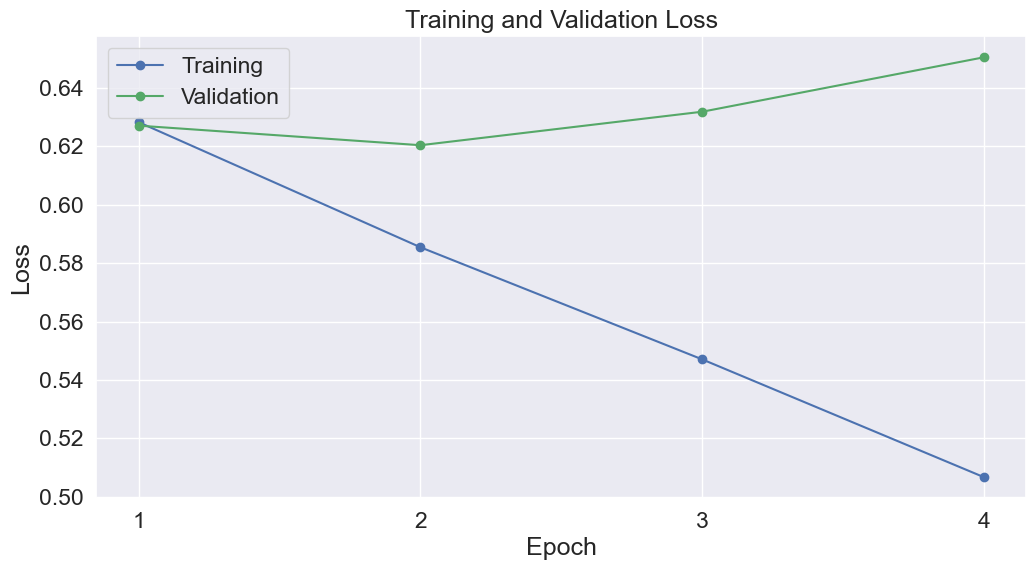

In [127]:
import seaborn as sns

sns.set_theme(style='darkgrid')

sns.set_theme(font_scale=1.5)
plt.rcParams['figure.figsize'] = (12, 6)

#plot the learning curve
plt.plot(df_states['training_loss'], 'b-o', label='Training')
plt.plot(df_states['eval_loss'], 'g-o', label='Validation')

#label the plot 
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.xticks([1, 2, 3, 4])

plt.show()




## Evidence ranking and presention

In [67]:
%pip install rank_bm25

Note: you may need to restart the kernel to use updated packages.


In [74]:
#test rank bm25
from rank_bm25 import BM25Okapi
import numpy as np

#create a corpus
corpus_df = train_df[['speaker', 'statement', 'label']].copy().sample(10000)
corpus = corpus_df['statement'].tolist()

print(len(corpus))

tokenized_corpus = [doc.split(" ") for doc in corpus]

bm25 = BM25Okapi(tokenized_corpus)


10000


In [75]:
sample_text = corpus[1]
print(sample_text)
entities = extract_entities(sample_text)
entities, entities[0][0]

Says Barack Obama grew up in Kenya.


([('Barack Obama', 'PERSON'), ('Kenya', 'GPE')], 'Barack Obama')

In [70]:
q = entities[1][0]
print(q)

tokenized_query = q.split(" ")
doc_score = bm25.get_scores(tokenized_query)

270,000


In [71]:
ranking_res = bm25.get_top_n(tokenized_query, corpus, n=5)
ranking_res

['Since Sept. 11, 2001, 270,000 Americans were killed by gunfire at home.',
 'Georgia has the nations fifth largest Women, Infants and Children (WIC) Supplemental Nutrition program, serving more than 270,000 mothers, babies and children every day.',
 'Says Obama wants to redesign the American flag "to better offer our enemies hope and love."',
 'Virginia is home to more veterans per capita than any state in America.',
 'This incident of supposed feces depicting a swastika on the wall of a bathrooms in one of the halls ... has been supported by zero fact.']

In [72]:

speaker = 'donald-trump'
senti = ranking_res[0]
sentiment_speaker_statement(model, speaker, senti)

-1.144722918407129


'false'

In [73]:
speaker = 'joe-biden'
senti = ranking_res[0]

sentiment_speaker_statement(model, speaker, senti)




0.3958333333333333


'half-true'

In [117]:
evidence_src = df_fever_train['evidence_wiki_url']

#filter out empty urls and remove duplicates
evidence_src = [x for x in evidence_src if x]
evidence_src = list(set(evidence_src))


len(evidence_src), evidence_src[:5]

(12549,
 ['1972_Nixon_visit_to_China',
  'Being_Cyrus',
  'Ben_Kingsley',
  'My_Summer_of_Love',
  'Debian'])

In [118]:
#fever dataset person filter 
entities_P = [extract_entities(x) for x in evidence_src]

#remove empty entities
entities_P = [x for x in entities_P if x]

In [121]:
#filter person 
entities_P = [x for x in entities_P if x[0][1] in ['PERSON']]
entities_P[:5], len(entities_P)

([[('Ben_Kingsley', 'PERSON')],
  [('Debian', 'PERSON')],
  [('Cleopatra', 'PERSON')],
  [('Snowpiercer', 'PERSON')],
  [('Mark_Millar', 'PERSON')]],
 986)

In [122]:
person_list = [entities_P[n][0][0] for n in range(len(entities_P))] 

#normalise person list
person_list = [x.lower() for x in person_list]

#replace underscore with hyphen
person_list = [x.replace('_', '-') for x in person_list]

person_list[:5], len(person_list)



(['ben-kingsley', 'debian', 'cleopatra', 'snowpiercer', 'mark-millar'], 986)

In [123]:
speaker_ls = list(model.keys())
speaker_ls[:5], len(speaker_ls)

(['scott-surovell',
  'barack-obama',
  'blog-posting',
  'charlie-crist',
  'robin-vos'],
 2910)

In [124]:
#compare speaker list with person list and return common speakers
common_speaker = [x for x in speaker_ls if x in person_list]
common_speaker[:5], len(common_speaker)

(['jeb-bush', 'ben-affleck', 'emma-watson', 'snooki', 'david-beckham'], 6)

## Evaluation

In [ ]:
#plan build evaluation function using acc, f1, recall, precision
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score
